## NLP with DL (Standart)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
df = pd.read_csv('hepsiburada.csv')
df.head(2)

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş


In [102]:
len(df)

243497

## Tokenization

In [103]:
X = df['Review'].values # DL de hemen array yapıyoruz.
y = df['Rating'].values

In [104]:
df['Review'].shape

(243497,)

In [106]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
#duygu analizlerinde 15000 kadar veri yeterlidir. DL modellerde hiçbir şey çıkarmamıza gerek yok.
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır. çeviri yapacaksam filters = '' olarak yapılır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [9]:
tokenizer.fit_on_texts(X)

## Creating word index

In [11]:
tokenizer.word_index # kullanım sıklığı en fazla olandan küçüğe doğru sıralanır.
# bu kod corpustaki bütün tokenların sıklığını verir. ancak model yine belirttiğimiz gibi 15000 i verir.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [12]:
len(tokenizer.word_index)

217983

## Converting tokens to numeric

In [13]:
X_num_tokens = tokenizer.texts_to_sequences(X) # yukarıdaki (tokenizer.word_index ) indeks numaralarına göre X i numaralandırır.
# en faazla kullanılan ilk 15000 i aldığı için sequence deki indeks sırası değişebilir. aşağıda 'çok' token i indeksi 6 ama sequence de 5

In [108]:
np.array(X_num_tokens)

<ipython-input-108-cacf31673051>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(X_num_tokens)


array([list([52, 462, 1617, 4510]), list([52, 462, 55, 584]),
       list([4, 234, 29, 150, 1, 76, 3717, 1698, 274, 82, 4689, 10517, 77, 187, 295, 2020, 8, 262, 5957, 433, 1, 7, 280, 1041, 8857, 11, 648, 78, 1221, 225, 23, 5, 1763, 1, 1568, 64, 68, 1, 6, 5, 1754, 893, 127, 288, 1348, 119, 20, 3684, 5028, 31, 172, 4077, 4859, 1930, 9977, 25, 8329, 3, 5, 9977, 57, 1696, 174, 595, 16, 1816]),
       ..., list([15, 27, 7, 4]),
       list([44, 79, 15, 2, 136, 101, 639, 2740, 542, 33]),
       list([117, 42, 152, 1185, 2211, 790, 97, 8036, 2211, 739, 2834, 211, 4092, 797, 987, 21, 156, 4629, 1013, 33, 2568, 44, 2881, 2806, 2881, 117, 152, 28, 6, 27, 110, 4628, 63, 2321, 76, 12260, 92, 21])],
      dtype=object)

In [117]:
words = pd.DataFrame.from_dict(tokenizer.word_index, orient="index")
words.columns = ["words"]

In [139]:
print(words.iloc[["1815", "5359", "130", "22", "0", "1848", "800"]])

             words
logitech      1816
ürünlerinin   5360
kalite         131
olarak          23
çok              1
iyidir        1849
alacaklara     801


In [10]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [17]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [18]:
len(X_num_tokens[105])# tokenlerin boyutlarını kontrol ediyorum.

22

In [19]:
len(X_num_tokens[106])

18

In [110]:
num_tokens = [len(i) for i in X_num_tokens] # her yorumdaki token sayılarının len ini buluyorum.. burada 250bin token leni bulunur.
num_tokens = np.array(num_tokens) # her yorum kaç tokenden oluşuyor.. bunu buluyoruz.

In [111]:
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

In [29]:
len(num_tokens)

243497

## Maximum number of tokens for all documents

In [21]:
num_tokens.mean() # bütün tokenların boyut mean i alınır

21.36101060793357

In [22]:
num_tokens.max() # en uzun yoruma ait token sayısı

298

In [23]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [26]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [145]:
max_tokens = 61 # %90 ve üzeri bir token sayısı bulmak için belirlediğimiz sayı.. bu sayıyı değişirerek yüksek bir sample a ulaşmak isteriz.

In [146]:
sum(num_tokens < max_tokens) / len(num_tokens) # model e verdiğim örn. 15000 token üzerinden değerlendirme yapılır 

0.9598968365113328

In [147]:
# elimizde örneğin 61 den fazla olan tokenların son 61 tanesini alır.ve öncekileri siler
# token sayısı 61 den küçük olan yorumların ise baş tarafında sıfır ekleyerek 61 e tamamlar

## Fixing token counts of all documents (pad_sequences)

In [148]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [149]:
X_pad.shape

(243497, 61)

In [32]:
np.array(X_num_tokens[800]) # aşağıya doğru uzamasın diye array yapıldı

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [33]:
len(X_num_tokens[800])

31

In [144]:
words.iloc[800]

words    801
Name: alacaklara, dtype: int64

In [24]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10])

In [34]:
len(X_num_tokens[212558])

281

In [25]:
np.array(X_num_tokens[212558])

array([ 1789,  2440,     7,    44,  1837,    38,    84,   250,    85,
          84,  2181,    41,    26,   134,   209,     3,   716,    11,
         795,     5,  1478,    58,  1478,    72,   181,  1943,    44,
        1433,  4082,   947,   625,   636,    26,  2817,  5518,  3515,
         241,  1158,  1174,   454,   874,   755,     1,     7,     3,
          45,  2555,     1,     6,   585,  1068,  1160,   170,   811,
        2440,  1455,   472,  1785,  2704,  2223,   182,    49,     1,
           6,   188,     1,   402,    65,    65,  2330,   345, 13609,
         104,  1427,    46,    52,   261,    63,  3515,   260,   232,
        2108,    50,    12,     2, 10826,  5593,     5,    31, 12274,
        4819,     2,  2731,    60,    28,   111,  9906,     1,    79,
         571,  3637,   546,  5455,     1,     6,  2714,   373,   118,
         604,   250,  7804,  5277,  6164,  1263,    23,  2871,    14,
           6,   133,    56,  8334,    20,  3515,  1174,   170,    14,
           3,   402,

In [26]:
X_pad[212558]

array([ 367,    1,   24,   80,  133,   90,  245, 2219, 9352,    5,   39,
        315,   25,    6,   44,  245, 2233,    8, 9698,  167,   37,  275,
        232,    5, 3979,  134, 7919, 2118,  310,  437, 4901,   36,   25,
        138,  940,  590,    3, 1625,  590,   12,    5,  874,  335,    2,
       2204,   17,  501,  420,  961,   17,   36, 4289, 2091, 2740,   60,
          1,   96,    9,   10,  898, 4239])

## Converting numeric tokens to string

In [36]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [37]:
index = tokenizer.word_index # daha sonra kkullanabileceğim bir dict e dönüştürdüm
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [154]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [38]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = ' '.join(words)
    return text

In [155]:
X[105] #yorumun ilk ham hali..

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [156]:
tokens_to_string(X_num_tokens[105])

'logitech ürünlerinin kalite olarak çok iyidir tam ama 10 un üzerinde kendime arkadaşlarıma almışımdır hepside memnunlar i̇htiyacı olan kaçırmasın başkada ürün derim'

## Train Set Split

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101) 
# her yorumun içinde bir sıralaması olduğundan bu şekilde split yapıyoruz. time series gibi değil?

## Modelling

In [159]:
model = Sequential() # sıralı bir modelim var.

In [160]:
embedding_size = 100 # embedding layerımız var burada.. daha önce dense vs. veriyorduk.. burda öncelikle embedding vermemiz gerekir.
# modele verilen dizinlerin içindeki tokenlerin her birini verilen boyut kadar verktörlere dönüştürecek.. büyük olması daha doğru sonuç verebilğir.
# modele verdiğim 61 tokenleri 100 lük vektörlere dönüştürür

In [161]:
model.add(Embedding(input_dim=num_words, # modelim kaç token ile eğitilecek
                    output_dim=embedding_size, # 15000 inputumun hepsini 100 lük embedding vektörlere dönüştür ve RNN modele gönder.
                    input_length=max_tokens, #sana gödenrdiğim her dizin 61 tokenden, boyuttan oluşuyor.
                    name='embedding_layer')) #

In [36]:
# pip install -U numpy==1.19.5

In [162]:
model.add(GRU(units=48, return_sequences=True)) # genelde 4-5 hidden layer i geçmez.. katman sayıusı arttıkça sonuçların iyileşmediği biliniyor.
model.add(GRU(units=24, return_sequences=True)) # units: Nöron sayısı, 'return_sequences=True' ile cell state ve hidden state döngüsünü sağlar.
model.add(GRU(units=12)) #son layer GRU ya da LSTM değilse 'return_sequences=True' vermeye gerek yok
model.add(Dense(1, activation='sigmoid'))

In [163]:
optimizer = Adam(learning_rate=0.004)

In [164]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [165]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 61, 100)           1500000   
_________________________________________________________________
gru_3 (GRU)                  (None, 61, 48)            21600     
_________________________________________________________________
gru_4 (GRU)                  (None, 61, 24)            5328      
_________________________________________________________________
gru_5 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [166]:
from tensorflow.keras.callbacks import EarlyStopping # restore_best_weights=True : en iyi ağırlıklara günceller. epoch lardaki en iyi skora döner

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [167]:
pd.Series(y_train).value_counts(normalize=True) # normalize=tTrue oran olarak verir.

1    0.943834
0    0.056166
dtype: float64

In [168]:
weights = {0:95, 1:5} # ağırlaklandırma yukarıda ifade edildiği gibi yapılır. int kullanılacak

In [169]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
761/761 [==============================] - 60s 76ms/step - loss: 3.1726 - recall: 0.8543 - val_loss: 0.2937 - val_recall: 0.8743
Epoch 2/25
761/761 [==============================] - 55s 72ms/step - loss: 1.6712 - recall: 0.9326 - val_loss: 0.2058 - val_recall: 0.9276
Epoch 3/25
761/761 [==============================] - 54s 71ms/step - loss: 1.0987 - recall: 0.9571 - val_loss: 0.1466 - val_recall: 0.9605
Epoch 4/25
761/761 [==============================] - 53s 70ms/step - loss: 0.7954 - recall: 0.9701 - val_loss: 0.2224 - val_recall: 0.9353
Epoch 5/25
761/761 [==============================] - 53s 70ms/step - loss: 0.6395 - recall: 0.9769 - val_loss: 0.1993 - val_recall: 0.9543
Epoch 6/25
761/761 [==============================] - 53s 70ms/step - loss: 0.5152 - recall: 0.9817 - val_loss: 0.1715 - val_recall: 0.9700
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [170]:
model.history.history

{'loss': [3.17260479927063,
  1.6711852550506592,
  1.0987062454223633,
  0.7954115271568298,
  0.6395150423049927,
  0.5152444243431091],
 'recall': [0.8542826771736145,
  0.9325994253158569,
  0.9571294784545898,
  0.9700961709022522,
  0.9769058227539062,
  0.9817139506340027],
 'val_loss': [0.2937268316745758,
  0.20582367479801178,
  0.14661797881126404,
  0.2223958671092987,
  0.19926559925079346,
  0.171495258808136],
 'val_recall': [0.8743391633033752,
  0.9275971055030823,
  0.9605134129524231,
  0.9352551102638245,
  0.954269528388977,
  0.9699771404266357]}

## Model evaluation

In [171]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,recall,val_loss,val_recall
0,3.172605,0.854283,0.293727,0.874339
1,1.671185,0.932599,0.205824,0.927597
2,1.098706,0.957129,0.146618,0.960513
3,0.795412,0.970096,0.222396,0.935255
4,0.639515,0.976906,0.199266,0.954270
5,0.515244,0.981714,0.171495,0.969977


<AxesSubplot:>

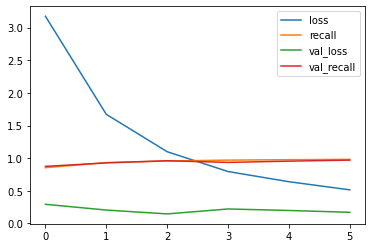

In [172]:
model_loss.plot()

In [173]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 34s 6ms/step - loss: 0.0644 - recall: 0.9776


[0.06436475366353989, 0.9776346683502197]

In [174]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 8s 5ms/step - loss: 0.1466 - recall: 0.9605


[0.14661814272403717, 0.9605134129524231]

In [182]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 10737    204]
 [  4112 179744]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10941
           1       1.00      0.98      0.99    183856

    accuracy                           0.98    194797
   macro avg       0.86      0.98      0.91    194797
weighted avg       0.98      0.98      0.98    194797



In [176]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 2089   646]
 [ 1815 44150]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2735
           1       0.99      0.96      0.97     45965

    accuracy                           0.95     48700
   macro avg       0.76      0.86      0.80     48700
weighted avg       0.96      0.95      0.95     48700



In [177]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [178]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [179]:
y_pred2 = np.array([i[0] for i in y_pred])
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [180]:
incorrect = np.where(y_test != y_pred2)   # tahminlerden kaç tanesini yanlış tahmin etmişim ona bakacağım
incorrect # önce yanlış tahminlerin index ini alıyorum

(array([   49,    52,    55, ..., 48622, 48625, 48678], dtype=int64),)

In [184]:
incorrect[0]

array([   49,    52,    55, ..., 48622, 48625, 48678], dtype=int64)

In [185]:
incorrect = incorrect[0]
incorrect

array([   49,    52,    55, ..., 48622, 48625, 48678], dtype=int64)

In [186]:
len(incorrect)

2461

In [187]:
idx = incorrect[0]
idx

49

In [188]:
text = X_test[idx]
text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   15,  548, 3488,   16,   80,    4,   84,
        704, 5686,   33, 1820, 2360,  357])

In [189]:
tokens_to_string(text)

'hızlı gönderim i̇çin teşekkürler fakat ürün şarj yeri yamuk geldi kargodan kaynaklı sanırım'

In [190]:
y_pred[idx]

array([0])

In [191]:
y_test[idx]

1

In [71]:
y_pr = model.predict(X_test)

In [72]:
y_pr[idx]

array([0.08925438], dtype=float32)

## Predicton

In [192]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [193]:
tokens = tokenizer.texts_to_sequences(reviews)

In [194]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [195]:
model.predict(tokens_pad)

array([[0.9947392 ],
       [0.95522547],
       [0.00455809],
       [0.8709729 ],
       [0.03206402],
       [0.00562915],
       [0.92247   ],
       [0.07345593],
       [0.98343647],
       [0.00849155],
       [0.9932008 ],
       [0.0787828 ],
       [0.00517341],
       [0.6672099 ]], dtype=float32)